In [ ]:
# ** (Colab only) Run this cell once at session start **
!rm -rf digit-recognition
!git clone https://github.com/dev079144/digit-recognition.git
%cd digit-recognition/notebooks
%pip install -r requirements.txt

Cloning into 'digit-recognition'...


OSError: [Errno 5] Input/output error

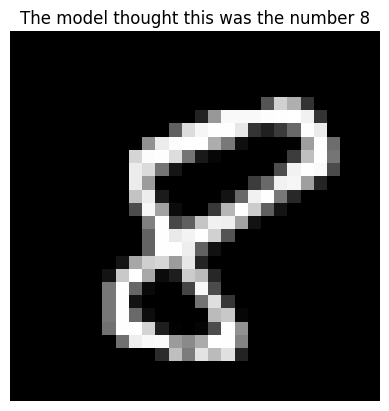

In [8]:
# Inference
# This cell runs samples to test the model
# If there are saved weights from training, this cell will prompt for weights selection
# Otherwise the model will load pre-trained weights as a default

import sys
import os
sys.path.append(os.path.abspath('../src'))
import re
import numpy as np
import matplotlib.pyplot as plt
from utils import process_data, download_data
from model import MLP

download_data('test')

x, y, n_of_classes = process_data('../data/mnist_test.csv')

input_size = x.shape[0]
output_size = n_of_classes

default_weights = 'Weights_20250718_0037_hidden-128_batch-32_rate-0.01.npz'

models_directory = '../models'

saved_weights = sorted([
    f for f in os.listdir(models_directory)
    if f.endswith('.npz')
])

selected_weights = default_weights

if len(saved_weights) > 1:
    print('Available weights:')

    for i, file in enumerate(saved_weights):
        default_marker = " (default)" if file == default_weights else ""
        print(f"[{i}] {file}{default_marker}")

    default_index = saved_weights.index(default_weights)
    choice = input(f"Select weights [0-{len(saved_weights)-1}] (Enter for default)")
    index = default_index if choice == '' else int(choice)

    selected_weights = saved_weights[index]

    print(f'Using weights: {selected_weights}')

weights_path = os.path.join(models_directory, selected_weights)

match = re.search(r'hidden-([\d\-]+)', selected_weights)

if match:
    hidden_sizes_str = match.group(1)
    hidden_sizes = list(map(int, hidden_sizes_str.split('-')))
else:
    hidden_sizes = [128]

model = MLP(input_size, hidden_sizes, output_size)

model.load(weights_path)

random_index = np.random.randint(x.shape[1])

random_x = x[:, random_index].reshape(-1, 1)
random_y = y[:, random_index]

activations, pre_activations = model.forward(random_x)

prediction = np.argmax(activations[f'A{model.connections}'])

image_dimension = int(np.sqrt(x.shape[0]))
reshaped_x = random_x.reshape(image_dimension, image_dimension)

plt.imshow(reshaped_x, cmap='gray')
plt.title(f'The model thought this was the number {prediction}')
plt.axis('off')
plt.show()
